In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_excel("CUSTOMERS.xlsx")
employees = pd.read_excel("EMPLOYEES.XLSX")
items = pd.read_excel("ITEMS.XLSX")
orderInfo = pd.read_excel("ORDERINFO.XLSX")
orders = pd.read_excel("ORDERS.XLSX")

In [3]:
## no info can be gaines from orderInfo table, its just a main table that connects other tables
orderInfo.head(2)

,Order No,Item No,Quantity
0,1,68,1
1,1,99,1


In [4]:
## observation, there are many orders with the same order number

In [5]:
orders.head(2)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53
1,2,1733,167,2010-02-22,2010-02-23,34.58


In [6]:
orderdetails = pd.merge(orderInfo, orders, how="outer", on="Order No")

In [7]:
orderdetails.head(5)

,Order No,Item No,Quantity,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,68.0,1.0,3843,53,2010-02-22,2010-03-01,49.53
1,1,99.0,1.0,3843,53,2010-02-22,2010-03-01,49.53
2,1,119.0,1.0,3843,53,2010-02-22,2010-03-01,49.53
3,2,36.0,1.0,1733,167,2010-02-22,2010-02-23,34.58
4,2,101.0,1.0,1733,167,2010-02-22,2010-02-23,34.58


In [8]:
items.head(3)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067
1,2,He fishes to live,24.148495,25.236653
2,3,Eating well,21.446596,23.569391


In [9]:
orderinfo_items = pd.merge(orderInfo,items, how="outer", on="Item No")

In [10]:
orderinfo_items.sort_values(by="Order No", ascending=True,inplace=True)

In [11]:
orderinfo_items.head(3)

,Order No,Item No,Quantity,CD ROM Title,Cost Price,Nominal Sale Price
0,1,68,1,Punting on the Cam,3.146996,3.374212
3059,1,99,1,On vocals - Fish,13.081633,13.149912
6167,1,119,1,A chip on the shoulder,22.161673,22.677173


In [12]:
orders.head(2)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53
1,2,1733,167,2010-02-22,2010-02-23,34.58


In [13]:
items.head(2)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067
1,2,He fishes to live,24.148495,25.236653


In [14]:
orderInfo.columns

Index(['Order No', 'Item No', 'Quantity'], dtype='object')

In [15]:
orders.columns

Index(['Order No', 'Customer ID', 'Employee Code', 'Order Date',
       'Dispatch Date', 'total'],
      dtype='object')

In [16]:
items.columns

Index(['Item No', 'CD ROM Title', 'Cost Price', 'Nominal Sale Price'], dtype='object')

In [17]:
customers.columns

Index(['Customer ID', 'Title', 'First Name', 'Last Name'], dtype='object')

In [18]:
employees.columns

Index(['Employee Code', 'First Name', 'Last Name'], dtype='object')

### findind the highest no of products sold

In [19]:
orderInfo["Item No"].value_counts().sort_values(ascending=True)

81     2927
49     2935
1      2938
62     2956
123    2957
       ... 
28     3174
14     3176
80     3177
131    3214
18     3232
Name: Item No, Length: 150, dtype: int64

### Orders table analysis

In [20]:
orders.head(2)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53
1,2,1733,167,2010-02-22,2010-02-23,34.58


Text(0, 0.5, 'No of Orders')

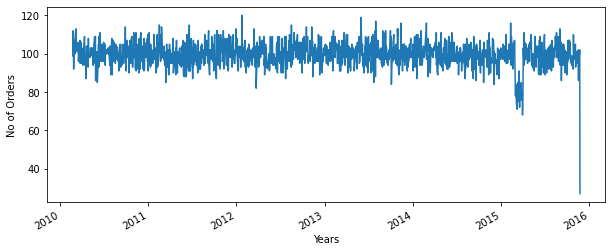

In [21]:
orders["Order Date"].value_counts().sort_values(ascending=False).plot(figsize = (10,4))
plt.xlabel("Years")
plt.ylabel('No of Orders') 

In [22]:
orders["Order Date"].sort_values(ascending=False)

149424   2015-11-24
149410   2015-11-24
149398   2015-11-24
149399   2015-11-24
149400   2015-11-24
            ...    
69       2010-02-22
70       2010-02-22
71       2010-02-22
72       2010-02-22
0        2010-02-22
Name: Order Date, Length: 149425, dtype: datetime64[ns]

In [23]:
orders.head(2)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53
1,2,1733,167,2010-02-22,2010-02-23,34.58


In [24]:
orderInfo.head(2)

,Order No,Item No,Quantity
0,1,68,1
1,1,99,1


In [25]:
items.head(2)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067
1,2,He fishes to live,24.148495,25.236653


## understanding the customer purchases through the orders table

In [131]:
orders["Customer ID"].value_counts().mean()

18.678125

In [124]:
total_customer_purchases = orders["Customer ID"].value_counts()

C:\Users\vamsee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count of number of orders')

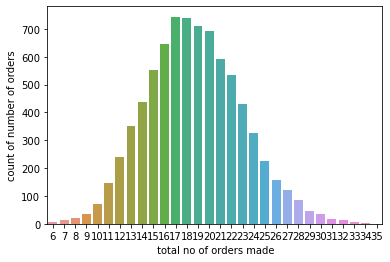

In [128]:
sns.countplot(total_customer_purchases)
plt.xlabel(" total no of orders made")
plt.ylabel('count of number of orders')

In [27]:
sample_cust_orders = orders[orders["Customer ID"]==5912]
sample_cust_orders.head(5)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
3580,3582,5912,154,2010-04-12,2010-04-15,79.57
9358,9360,5912,24,2010-06-30,2010-07-02,49.72
10873,10875,5912,20,2010-07-22,2010-07-28,34.66
11295,11297,5912,82,2010-07-28,2010-08-02,49.48
18356,18358,5912,44,2010-11-03,2010-11-15,19.64


In [28]:
samp_cust_5912 = pd.merge(orderInfo, sample_cust_orders, how="outer",on=["Order No"])

In [29]:
samp_cust_5912.dropna(inplace=True)

In [30]:
samp_cust_5912.drop(['total'],axis=1,inplace=True)

In [31]:
samp_cust_5912.sample(3)

,Order No,Item No,Quantity,Customer ID,Employee Code,Order Date,Dispatch Date
285504,92300,79,1,5912.0,165.0,2013-09-04,2013-09-12
34866,11297,11,1,5912.0,82.0,2010-07-28,2010-08-02
193313,62601,146,1,5912.0,112.0,2012-07-18,2012-08-02


In [32]:
samp_cust_5912_items = pd.merge(items, samp_cust_5912, how="outer", on=["Item No"])

In [33]:
samp_cust_5912_items.dropna(inplace=True)

In [34]:
samp_cust_5912_items.loc[samp_cust_5912_items["CD ROM Title"].str.contains("Zip")]

,Item No,CD ROM Title,Cost Price,Nominal Sale Price,Order No,Quantity,Customer ID,Employee Code,Order Date,Dispatch Date
68,54,Zip Scarlet lives to fight another day,15.015264,15.842595,32317.0,1.0,5912.0,181.0,2011-05-19,2011-05-20
69,54,Zip Scarlet lives to fight another day,15.015264,15.842595,32669.0,1.0,5912.0,107.0,2011-05-24,2011-06-06
70,54,Zip Scarlet lives to fight another day,15.015264,15.842595,65792.0,1.0,5912.0,49.0,2012-08-31,2012-09-04
71,54,Zip Scarlet lives to fight another day,15.015264,15.842595,94488.0,1.0,5912.0,173.0,2013-10-04,2013-10-14
72,55,Zip Scarlet meets Gill Bates,1.088332,1.139739,94488.0,1.0,5912.0,173.0,2013-10-04,2013-10-14


In [35]:
samp_cust_5912_items.groupby(["CD ROM Title"]).size().sort_values()

CD ROM Title
5 Minutes to brain surgery                  1
Ireland                                     1
Many of my best friends are salespersons    1
Microsoft, the inside story                 1
Monumental Stonemasonry                     1
                                           ..
Still Cam Waters                            3
The boy's CD-ROM of trains                  3
Rugger is the tops                          3
The girl's CD-ROM of penguins               3
Zip Scarlet lives to fight another day      4
Length: 79, dtype: int64

In [111]:
samp_cust_5912_items["CD ROM Title"].value_counts()

Zip Scarlet lives to fight another day    4
The girl's CD-ROM of penguins             3
The boy's CD-ROM of trains                3
Rugger is the tops                        3
Still Cam Waters                          3
                                         ..
Basso profundo                            1
On the drum kit                           1
Hiding out in Paris                       1
Take me to Dundee                         1
Thousand yard stares                      1
Name: CD ROM Title, Length: 79, dtype: int64

In [36]:
items.head(3)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067
1,2,He fishes to live,24.148495,25.236653
2,3,Eating well,21.446596,23.569391


In [37]:
customers.loc[customers["Customer ID"]== 5912]

,Customer ID,Title,First Name,Last Name
5911,5912,Mrs,Joyce,Moon


## orders table analysis with employee data

In [38]:
orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53


In [39]:
items.head(1)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067


In [40]:
items.shape

(150, 4)

In [41]:
items.iloc[:,1].value_counts()

The girl's CD-ROM of penguins                1
The boy's CD-ROM of boats                    1
The boy's CD-ROM of trains                   1
Stories from inside and outside Microsoft    1
Does God drive a Napier-Railton?             1
                                            ..
The Golden Gate bridge                       1
It's a long way to Truro                     1
5 Minutes to brain surgery                   1
Bentley, the man and his cars                1
Major influences in British politics         1
Name: CD ROM Title, Length: 150, dtype: int64

### stratification of purchases using gender

In [42]:
customers.head(2)

,Customer ID,Title,First Name,Last Name
0,1,Mr,Alan,Perkins
1,2,Mrs,May,Smith


In [43]:
customers["Title"].value_counts()

Mr      3157
Mrs     2736
Ms      1975
Miss     132
Name: Title, dtype: int64

In [44]:
orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53


In [45]:
orderInfo.head(1)

,Order No,Item No,Quantity
0,1,68,1


In [46]:
order_item= pd.merge(orderInfo, orders, how="inner", on="Order No" )

In [47]:
order_item.head(1)

,Order No,Item No,Quantity,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,68,1,3843,53,2010-02-22,2010-03-01,49.53


In [48]:
order_item= order_item[["Item No","Customer ID"]]

In [49]:
order_item.head(1)

,Item No,Customer ID
0,68,3843


In [50]:
order_item_customer = pd.merge(order_item, customers, how="inner", on ="Customer ID" )

In [51]:
order_item_customer.head(1)

,Item No,Customer ID,Title,First Name,Last Name
0,68,3843,Mrs,Jessie,Eadie


In [52]:
order_item_customer_final = pd.merge(order_item_customer, items, on="Item No", how="outer")

In [53]:
order_item_customer_final= order_item_customer_final[["Title","CD ROM Title"]]

In [54]:
order_item_customer_final['Title'].sort_values().value_counts()

Mr      182901
Mrs     157528
Ms      113823
Miss      7588
Name: Title, dtype: int64

<AxesSubplot:ylabel='Title'>

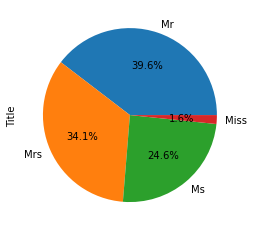

In [55]:
order_item_customer_final['Title'].sort_values().value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:>

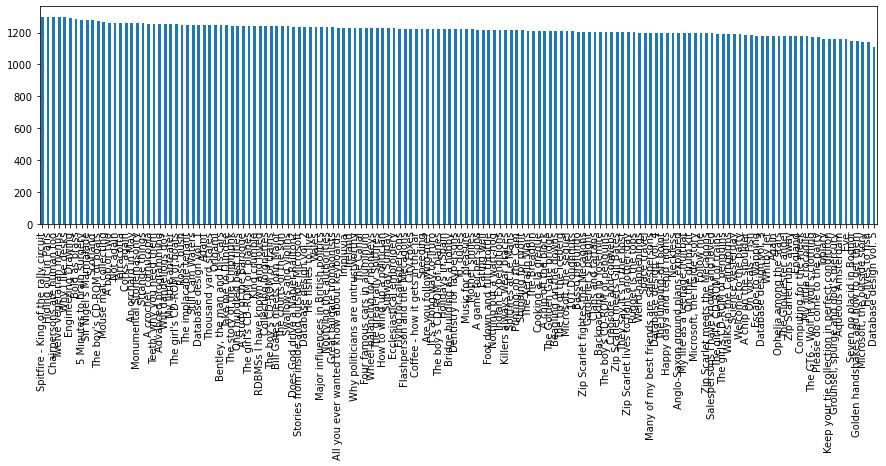

In [56]:
order_item_customer_final.loc[order_item_customer_final["Title"]=="Mr"]["CD ROM Title"].value_counts().plot(kind="bar", figsize=(15,4))


<AxesSubplot:>

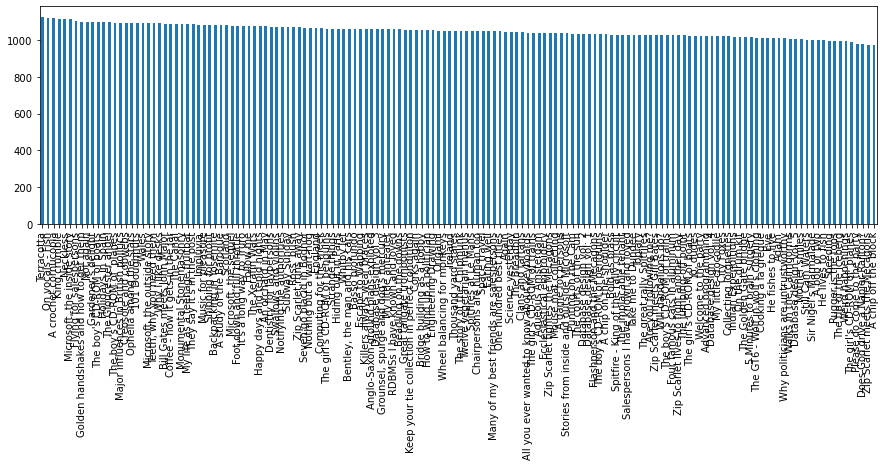

In [57]:
order_item_customer_final.loc[order_item_customer_final["Title"]=="Mrs"]["CD ROM Title"].value_counts().plot(kind="bar", figsize=(15,4))


<AxesSubplot:>

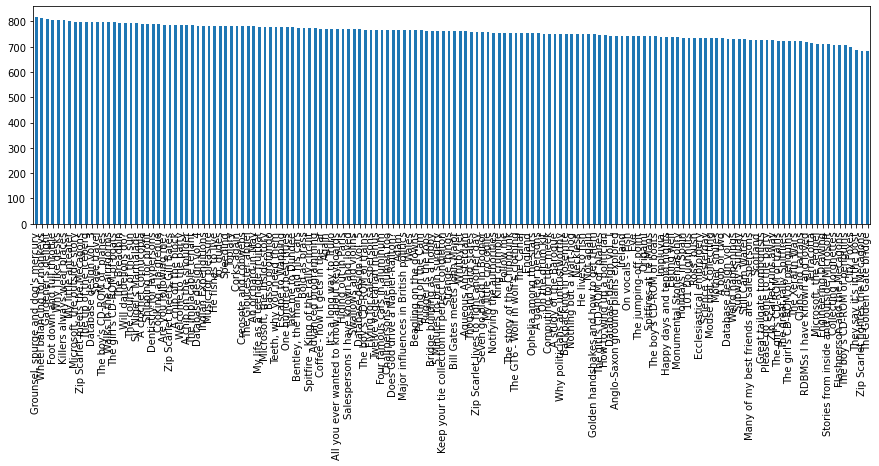

In [58]:
order_item_customer_final.loc[order_item_customer_final["Title"]=="Ms"]["CD ROM Title"].value_counts().plot(kind="bar", figsize=(15,4))


<AxesSubplot:>

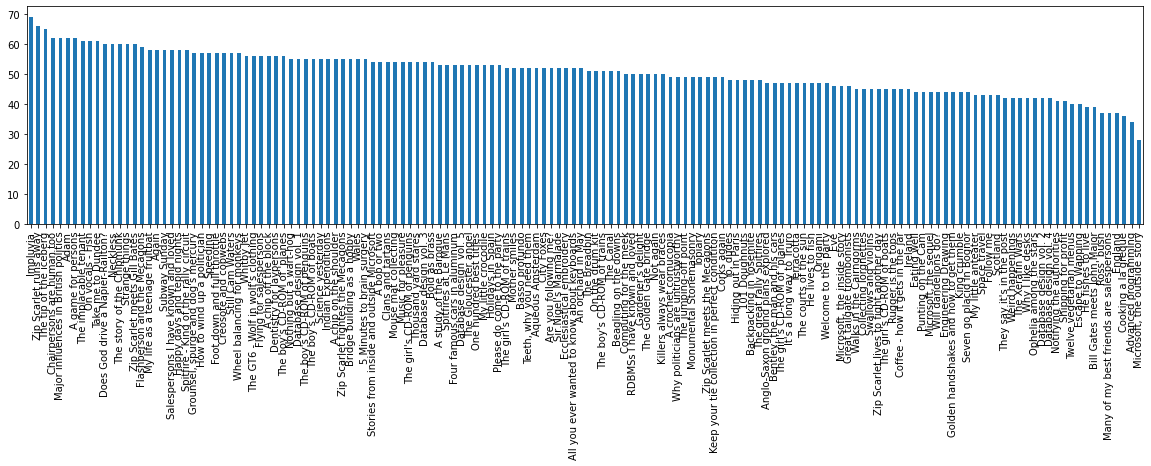

In [59]:
order_item_customer_final.loc[order_item_customer_final["Title"]=="Miss"]["CD ROM Title"].value_counts().plot(kind="bar", figsize=(20,4))


<AxesSubplot:ylabel='CD ROM Title'>

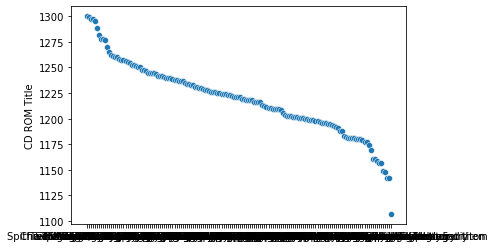

In [60]:
sns.scatterplot(data=order_item_customer_final.loc[order_item_customer_final["Title"]=="Mr"]["CD ROM Title"].value_counts())

### montly trends of orders

In [61]:
orderInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461840 entries, 0 to 461839
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Order No  461840 non-null  int64
 1   Item No   461840 non-null  int64
 2   Quantity  461840 non-null  int64
dtypes: int64(3)
memory usage: 10.6 MB


In [62]:
orderInfo.head(2)

,Order No,Item No,Quantity
0,1,68,1
1,1,99,1


In [63]:
orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total
0,1,3843,53,2010-02-22,2010-03-01,49.53


In [64]:
type(orders.iloc[:,3:4])

pandas.core.frame.DataFrame

In [65]:
pd.to_datetime(orders.iloc[1,3:4])["Order Date"].month

2

In [66]:
random_date= []
for x in range(len(orders)):
    #random_date.append(pd.to_datetime(x["Order Date"]).month)
    ##print(x)
    random_date.append(pd.to_datetime(orders.iloc[x,3:4])["Order Date"].month)
    


In [134]:
random_date

0          2
1          2
2          2
3          2
4          2
          ..
149420    11
149421    11
149422    11
149423    11
149424    11
Length: 149425, dtype: int32

In [67]:
random_date = np.array(random_date)
random_date = pd.Series(random_date)
#months = ["Jan","Feb","Mar","Apr" ,"May","Jun","Jul","Aug", "Sep","Oct", "Nov","Dec"]
##z =pd.cut(random_date,labels=months,bins=range(1,14))
##z.value_counts()
#random_date.replace({1:"Jan",2:'Feb',3:"Mar", 4:'Apr',5:'May',6:'Jun',7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace= True)

Text(0.5, 0, 'months')

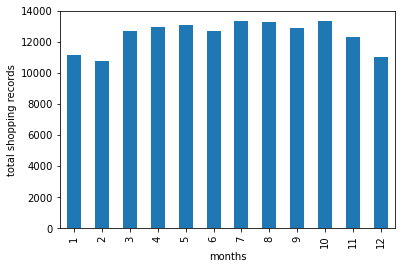

In [68]:
random_date.value_counts().sort_index().plot(kind = "bar")
plt.ylabel("total shopping records")
plt.xlabel('months') 

In [69]:
random_date.value_counts().sort_values()

2     10736
12    11040
1     11144
11    12293
3     12682
6     12708
9     12890
4     12916
5     13093
8     13272
7     13315
10    13336
dtype: int64

### male vs female monthly shopping patterns

In [70]:
new_orders = orders

In [71]:
new_orders["Month"]= random_date

In [72]:
new_orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month
0,1,3843,53,2010-02-22,2010-03-01,49.53,2


In [73]:
new_orders_customers= pd.merge(new_orders, customers, on = "Customer ID", how="left")

In [74]:
new_orders_customers.head(2)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month,Title,First Name,Last Name
0,1,3843,53,2010-02-22,2010-03-01,49.53,2,Mrs,Jessie,Eadie
1,2,1733,167,2010-02-22,2010-02-23,34.58,2,Ms,Elizabeth,Conway


In [100]:
new_orders_customers.groupby(["Month","Title"]).size()

Month  Title
1      Miss      188
       Mr       4353
       Mrs      3817
       Ms       2786
2      Miss      176
       Mr       4259
       Mrs      3661
       Ms       2640
3      Miss      213
       Mr       5004
       Mrs      4319
       Ms       3146
4      Miss      205
       Mr       5103
       Mrs      4388
       Ms       3220
5      Miss      206
       Mr       5195
       Mrs      4445
       Ms       3247
6      Miss      237
       Mr       4967
       Mrs      4360
       Ms       3144
7      Miss      219
       Mr       5301
       Mrs      4519
       Ms       3276
8      Miss      222
       Mr       5310
       Mrs      4535
       Ms       3205
9      Miss      191
       Mr       5143
       Mrs      4415
       Ms       3141
10     Miss      196
       Mr       5320
       Mrs      4576
       Ms       3244
11     Miss      211
       Mr       4758
       Mrs      4293
       Ms       3031
12     Miss      167
       Mr       4401
       Mrs      3728


<AxesSubplot:xlabel='Month', ylabel='count'>

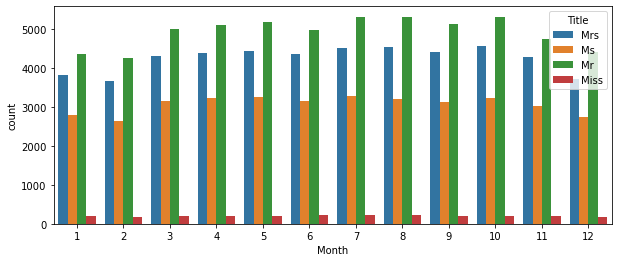

In [76]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data=new_orders_customers,x="Month", hue="Title",ax=ax)


In [77]:
orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month
0,1,3843,53,2010-02-22,2010-03-01,49.53,2


In [78]:
orders.iloc[0,3]

Timestamp('2010-02-22 00:00:00')

In [79]:
orders[orders["Order Date"]> orders["Dispatch Date"]]

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month


### finding the maximum income made

In [80]:
new_orders_customers.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month,Title,First Name,Last Name
0,1,3843,53,2010-02-22,2010-03-01,49.53,2,Mrs,Jessie,Eadie


In [96]:
new_orders_customers.groupby(["Month"])["total"].sum().sort_values()

Month
2     565683.96
12    585388.70
1     590786.05
11    646231.02
3     662379.74
6     674196.98
9     677247.00
4     679718.47
5     690032.08
7     701275.38
10    707083.93
8     709967.00
Name: total, dtype: float64

Text(0, 0.5, 'total income made')

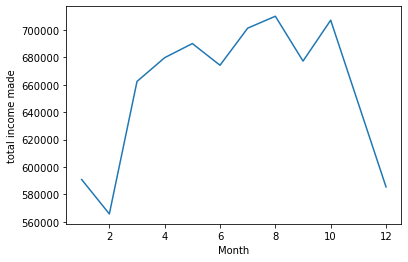

In [94]:
new_orders_customers.groupby(["Month"])["total"].sum().sort_index().plot(kind="line")
plt.ylabel("total income made")

### books sold before discount nd after discount

In [82]:
order_item_customer_final.head(1)

,Title,CD ROM Title
0,Mrs,Punting on the Cam


In [83]:
order_item_customer_final_1 = pd.merge(order_item_customer, items, on="Item No", how="outer")

In [84]:
order_item_customer_final_1.head(1)

,Item No,Customer ID,Title,First Name,Last Name,CD ROM Title,Cost Price,Nominal Sale Price
0,68,3843,Mrs,Jessie,Eadie,Punting on the Cam,3.146996,3.374212


In [85]:
items.head(1)

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067


In [86]:
items[items["Cost Price"]< items["Nominal Sale Price"]]

,Item No,CD ROM Title,Cost Price,Nominal Sale Price
0,1,He lives to fish,14.675622,14.891067
1,2,He fishes to live,24.148495,25.236653
2,3,Eating well,21.446596,23.569391
3,4,Advanced programming,18.009628,19.066674
4,5,Bridge building as a hobby,12.498061,12.698721
...,...,...,...,...
145,146,City Foxes,11.174949,11.613233
146,147,Basso profundo,21.969830,22.826450
147,148,The Xerafin Wars,3.285135,3.455926
148,149,Ophelia among the stars,5.075280,5.352100


### employee customer relationship

In [87]:
employees.head(1)

,Employee Code,First Name,Last Name
0,1,Helen,Ferguson


In [88]:
customers.head(1)

,Customer ID,Title,First Name,Last Name
0,1,Mr,Alan,Perkins


In [89]:
orders.head(1)

,Order No,Customer ID,Employee Code,Order Date,Dispatch Date,total,Month
0,1,3843,53,2010-02-22,2010-03-01,49.53,2


In [90]:
orders["Employee Code"].value_counts().sort_values()

4       343
2       358
23      640
67      649
25      654
       ... 
6       796
14      799
140     801
79      814
3      2596
Name: Employee Code, Length: 200, dtype: int64

In [106]:
orders["Employee Code"].value_counts().sort_values()

4       343
2       358
23      640
67      649
25      654
       ... 
6       796
14      799
140     801
79      814
3      2596
Name: Employee Code, Length: 200, dtype: int64

In [91]:
employees.loc[employees["Employee Code"]==3]

,Employee Code,First Name,Last Name
2,3,Owen,Edwards


In [92]:
emp_data=orders["Employee Code"].value_counts()

C:\Users\vamsee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'total products sold by an employee')

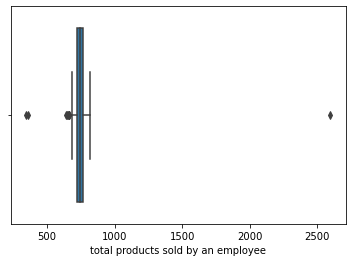

In [108]:
sns.boxplot(emp_data)
plt.xlabel("total products sold by an employee")

### analysis on quantity of items bought

In [ ]:
orderInfo.head(1)

In [ ]:
orderInfo.Quantity.value_counts()

In [ ]:
orderInfo.Quantity.value_counts(normalize=True)

In [ ]:
order_numbers_3 = orderInfo[orderInfo["Quantity"]==3]

In [ ]:
order_numbers_3.head(1)

In [ ]:
order_numbers_3= pd.merge(order_numbers_3, items, how="inner", on="Item No")

In [ ]:
order_numbers_3.head(1)

In [ ]:
sum(order_numbers_3["Nominal Sale Price"]- order_numbers_3["Cost Price"])

In [ ]:
order_numbers_2 = orderInfo[orderInfo["Quantity"]==2]

In [ ]:
order_numbers_2= pd.merge(order_numbers_2, items, how="inner", on="Item No")

In [ ]:
sum(order_numbers_2["Nominal Sale Price"]- order_numbers_2["Cost Price"])

In [ ]:
order_numbers_1 = orderInfo[orderInfo["Quantity"]==1]
order_numbers_1= pd.merge(order_numbers_1, items, how="inner", on="Item No")
sum(order_numbers_1["Nominal Sale Price"]- order_numbers_1["Cost Price"])

In [ ]:
### overall orders

In [ ]:
items.head(1)

In [ ]:
orders.head(1)